# King County Housing
#### House Price Estimate

**Authors:** Hatice Erdogan, Czarina Luna, Ross McKim, & Weston Shuken

##### January 2022

***

![image](Images/daria-nepriakhina-LZkbXfzJK4M-unsplash.jpg)

# Overview
A real estate agency in King County, Washington needed to improve their house price prediction to include important features that influence house pricing. We, the Data Tech Consultancy, worked on this project to build a better model that predicts the housing prices in King County. We analyzed over 21,000 house sale transactions between May 2014 and May 2015, and from this, developed a progression of multiple models that generated better results than the baseline model the agency used at first. The baseline model had an average error of 220,000 USD and our final model dropped it to over 120,000 USD. Finally, we created an online application for the real estate agents to use as their house price predictor.

## Business Problem
The real estate agency’s current house price prediction model is below standard with predictions that are not accurate enough and misinform the agency's decision-makers to make bad business decisions. Given the competitive landscape in King County, the agency needs a better predictor which we now provide with our `bestimate` model. We will help the real estate agents establish accurate house prices, help home buyers find the market value of houses they are interested in, and assist home sellers in the assessment of their home value.

## Data Understanding

The data used includes residential houses sold in King County from May 2014 to May 2015, and the features are as follows: date and price sold, number of bedrooms and bathrooms, square footage of living space and lot, number of floors, waterfront location, scores of view, condition, and grade, year built and renovated, zipcode location, and address' latitude and longitude. In addition, we used the 2010 population census to add population and density per zipcode and city or town. We analyzed all the features above to uncover which ones impact sale price the most. 

***

## Data Exploration & Data Preparation 


To start with, we imported the Python libraries necessary for the analysis.

In [1]:
# Importing all needed modules and packages needed.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pickle

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import PolynomialFeatures

Let's take a look at the dataset we have and perform the necessary cleaning.

In [2]:
#Importing the King County data and look at the first few data points.

raw_data = pd.read_csv('Data/kc_house_data.csv')
raw_data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [3]:
# Look at the types of data and find missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Takeaways:
There are many null values, some object data types, categorial values and dates. Let's clean it up below.

In [4]:
# Describing the data with inferential statistics.
raw_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Create a new dataframe of the raw data to clean
clean_data = raw_data.copy()

# Change to datetime and add month column
clean_data['date'] = pd.to_datetime(clean_data['date'])
clean_data['month'] = pd.DatetimeIndex(clean_data['date']).month

# Change waterfront missing value to NO, then to binary values.
clean_data.loc[raw_data.waterfront.isnull(), 'waterfront'] = 'NO'
clean_data['waterfront'] = clean_data['waterfront'].apply(lambda x: 0 if x == 'NO' else 1)

# Change view missing value to NONE, then to numerical ordered values.
clean_data.loc[raw_data.view.isnull(), 'view'] = "NONE"
view_dict = {'NONE':0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4}
clean_data['view'].replace(view_dict, inplace=True)

# Change condition to numerical ordered values.
cond_dict = {'Poor':0, 'Fair':1, 'Average':2, 'Good':3, 'Very Good':4}
clean_data['condition'].replace(cond_dict, inplace=True)

# Change grade to numerical ordered values.
clean_data['grade'] = clean_data['grade'].map(lambda x: int(x.split(' ')[0]))

# Add has_basement column that is a binary value.
clean_data['sqft_basement'] = clean_data['sqft_basement'].replace('?', '0').astype('float')
clean_data['basement'] = clean_data['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)

# Change yr_renovated missing values to 0 and add renovated column
clean_data.loc[raw_data.yr_renovated.isnull(), 'yr_renovated'] = 0
clean_data['renovated'] = clean_data['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

# Add house_age column
clean_data['age'] = clean_data['date'].dt.year - clean_data['yr_built']

### Handling the Outliers

Let's plot some of the variables to look for outliers:

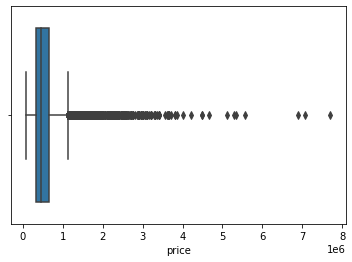

In [6]:
# Let's look at the price
sns.boxplot(clean_data['price']);

In [7]:
# Filtering out outliers of price in the data
clean_data = clean_data[(clean_data.price < clean_data.price.quantile(.995)) 
                        & (clean_data.price > clean_data.price.quantile(.005))]

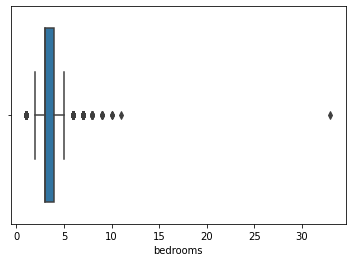

In [8]:
# Let's look at the bedrooms
sns.boxplot(clean_data['bedrooms']);

In [9]:
# We see the outlier on bedrooms that we change to 3 bedrooms, likely due to a typographic error
clean_data.loc[(clean_data.bedrooms == 33), 'bedrooms'] = 3

### Checking correlations and multicollinearity

In [10]:
# creating a function that takes in a dataframe and threshold and returns top correlations
def corr_check(df, threshold):
    '''
    Enter dataframe and threshold for correlation
    Returns table of the highly correlated pairs
    '''
    corr_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
    corr_df.set_index(['pairs'], inplace = True)
    corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
    corr_df.columns = ['cc']
    corr_df = corr_df.drop_duplicates()
    corr_df = corr_df[(corr_df['cc'] > threshold) & (corr_df['cc'] < 1)]
    return corr_df

corr_check(clean_data, .7)

,cc
pairs,
"(yr_renovated, renovated)",0.999968
"(age, yr_built)",0.999873
"(sqft_living, sqft_above)",0.869907
"(basement, sqft_basement)",0.826651
"(sqft_living15, sqft_living)",0.753874
"(sqft_living, grade)",0.751196
"(sqft_above, grade)",0.746135
"(sqft_living, bathrooms)",0.744481
"(sqft_living15, sqft_above)",0.727349


In [11]:
# Drop columns that have strong multicollinearity or provide no use to the model.
clean_data = clean_data.drop(columns=['id', 'date', 'yr_renovated', 'sqft_above', 'sqft_basement',
                      'yr_built', 'yr_renovated'])

In [12]:
clean_data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,month,basement,renovated,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,2,7,98178,47.5112,-122.257,1340,5650,10,0,0,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,2,7,98125,47.7210,-122.319,1690,7639,12,1,1,63


In [13]:
corr_check(clean_data, .7)

,cc
pairs,
"(sqft_living15, sqft_living)",0.753874
"(sqft_living, grade)",0.751196
"(bathrooms, sqft_living)",0.744481
"(sqft_lot15, sqft_lot)",0.718765
"(sqft_living15, grade)",0.705916


In [17]:
# This saved the clean_data file into the Data folder

# clean_data.to_csv('./Data/clean_data.csv')

### Takeaways:
There is still some multicollinearity between predictor variable, but not strong enough to initially drop on our models.

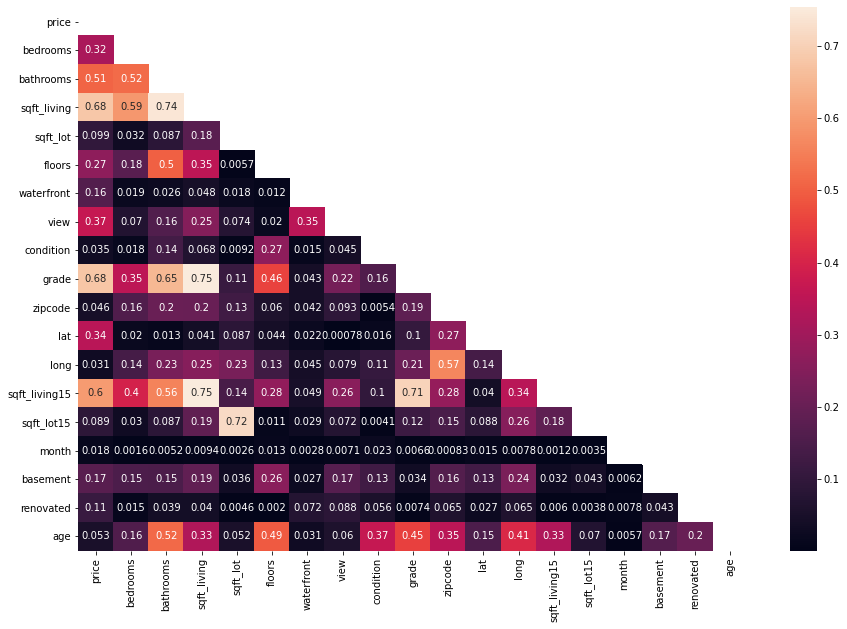

In [14]:
# A look at the Pearson correlation coefficients between variables by using a heatmap
corr = clean_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 10))
sns.heatmap(clean_data.corr().abs(), annot=True, mask=mask);

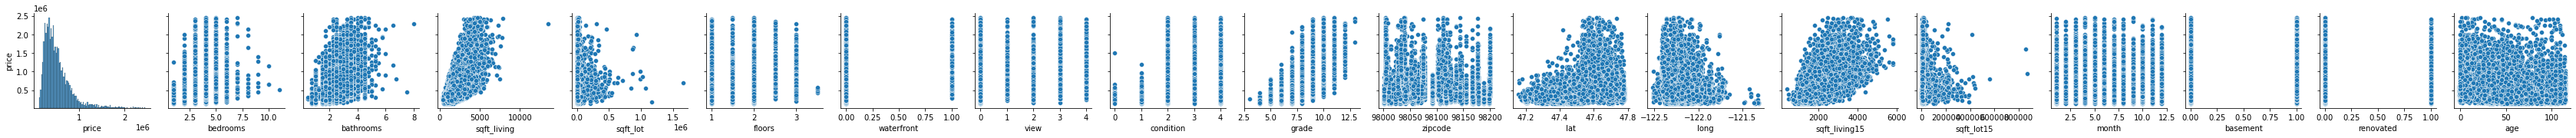

In [15]:
# Visualizing how each variable distributes? with price
sns.pairplot(clean_data, y_vars='price');

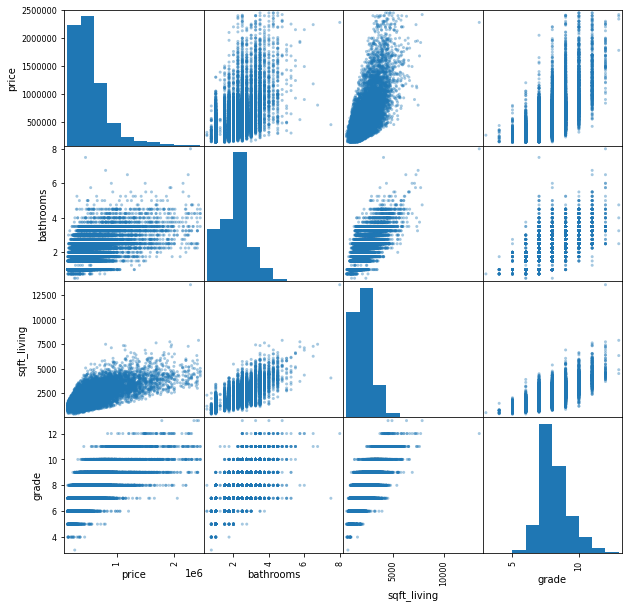

In [16]:
# A further look at certain attributes
attributes = ['price', 'bathrooms', 'sqft_living', 'grade']

pd.plotting.scatter_matrix(clean_data[attributes], figsize = [10, 10], alpha=0.4);
plt.show()

## Data Modeling
Now we will run linear regressions on our training set, and predict on the training set. First, we define functions to streamline the modeling process. We use multiple regression in modeling to predict the target variable, price, using the rest of the features as predictors. We also use it to create an inferential model to help the agency interpret the features and what the coefficients mean.

In [21]:
# Use linear regression
lr = LinearRegression()

In [22]:
# Our model needs to have only numeric variables. 
def only_numeric(data):
    '''returns a dataframe with only numeric values'''
    for column in data.columns:
        if is_numeric_dtype(data[column]) == False:
            data = data.drop(column, axis=1)
        else:
            continue
    return data

In [23]:
# Splits a dataframe into X and Y dataframes given a target column.
def get_y_X(data, target):
    '''Returns a series of target (y) value and a dataframe of predictors (X)'''
    y = data[target] 
    X = data.drop(target, axis=1)
    return y, X

In [24]:
# Returns training and test R2 & RMSE metrics
def get_metrics(X_tr, X_te, y_tr, y_te):
    ''' Parameters are X train, X test, y train, & y_test
        Performs multiple regression on the split test and returns metrics'''
    lr.fit(X_tr, y_tr)
    
    train_score = lr.score(X_tr, y_tr)
    test_score = lr.score(X_te, y_te)
    
    y_hat_train = lr.predict(X_tr)
    y_hat_test = lr.predict(X_te)
    
    train_rmse = np.sqrt(mean_squared_error(y_tr, y_hat_train))
    test_rmse = np.sqrt(mean_squared_error(y_te, y_hat_test))
    
    return train_score, test_score, train_rmse, test_rmse

In [25]:
# Prints the metrics of a multiple regression train and test, with option of OLS summary on train data.
def train_test_compare(X_tr, X_te, y_tr, y_te):
    '''Parameters are X train, X test, y train, & y_test
        Performs multiple regression on the split test and prints metrics'''
    lr.fit(X_tr, y_tr)
    
    train_score = lr.score(X_tr, y_tr)
    test_score = lr.score(X_te, y_te)
    
    y_hat_train = lr.predict(X_tr)
    y_hat_test = lr.predict(X_te)
    
    train_rmse = np.sqrt(mean_squared_error(y_tr, y_hat_train))
    test_rmse = np.sqrt(mean_squared_error(y_te, y_hat_test))
    
    print(f' training data R2: {train_score}\n testing data R2: {test_score} \
                    \n training data rmse: {train_rmse}\n testing data rmse: {test_rmse}')
    
    stats_summ = input('Do you want a statsmodel summary of the train data? (y/n)')
    if stats_summ == 'y':
        inter = lr.intercept_
        stats = sm.OLS(y_tr, sm.add_constant(X_tr)).fit()
        summary = stats.summary()
        print(summary)
    
    return
    

## Train Test Split
We split the raw data to a train and test set for a baseline model. We also split the clean data to a train and test set for a fully optimized model.

In [26]:
# Defining function that splits data into training and testing data.
def train_test(data, size=.25):
    '''Takes in dataframe, and size of test for the split
        Returns the train_set and test_set'''
    train_set, test_set = train_test_split(data, test_size=size, random_state=42)
    return train_set, test_set

In [27]:
# Create the dataframe for baseline model, and drop the missing values
baseline = only_numeric(raw_data)
baseline = baseline.dropna()

baseline_train_set, baseline_test_set = train_test(baseline, .25)
train_set, test_set = train_test(clean_data, .25)

### Baseline Model
This is the agency's baseline model that only uses the numerical features from the dataset.

In [28]:
# Getting ys and Xs for both the baseline train and test set
y_train, X_train = get_y_X(baseline_train_set, 'price')
y_test, X_test = get_y_X(baseline_test_set, 'price')

train_test_compare(X_train, X_test, y_train, y_test)

 training data R2: 0.6319749427235022
 testing data R2: 0.6181910518761328                     
 training data rmse: 226292.82659600402
 testing data rmse: 221129.32483151313


In [29]:
# Returning the metrics
get_metrics(X_train, X_test, y_train, y_test)

(0.6319749427235022,
 0.6181910518761328,
 226292.82659600402,
 221129.32483151313)

### Model Metrics Table
Let's create a table with the important metrics from the model, which we will update with every additional model after. The r-squared values and the root mean squared errors of both the training and the testing sets will be stored in this table. The r-squared value tells us the percentage of variance explained by the model. The root mean squared error measures the prediction error of the model.

In [30]:
# Creating empty metric table
metric_table = pd.DataFrame(columns = ['model', 'train_rsquared', 'test_rsquared', 'train_rmse', 'test_rmse'])

In [31]:
# Defining function that appends model metrics to the metrics table.
def update_metrics(model_name, X_tr, X_te, y_tr, y_te):
    train_score, test_score, train_rmse, test_rmse = get_metrics(X_tr, X_te, y_tr, y_te)
    return metric_table.append({'model': model_name, 'train_rsquared': train_score, 
                                'test_rsquared': test_score, 'train_rmse': train_rmse, 
                                'test_rmse': test_rmse}, ignore_index = True)

In [32]:
# Apply the update_metrics function to the Baseline Model to append the results.
metric_table = update_metrics('Baseline Model', X_train, X_test, y_train, y_test)
metric_table

,model,train_rsquared,test_rsquared,train_rmse,test_rmse
0,Baseline Model,0.631975,0.618191,226292.826596,221129.324832


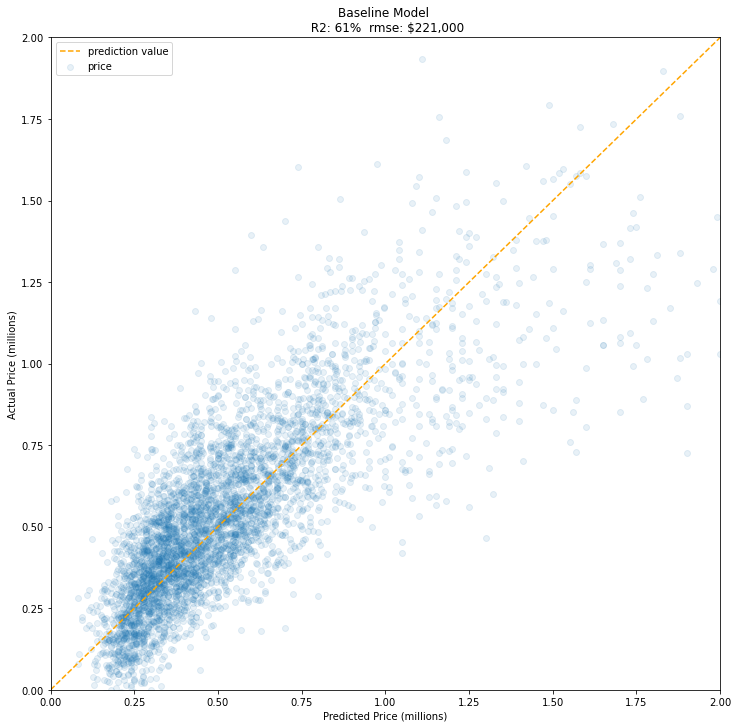

In [33]:
# Visualizing the baseline model accuracy 
y_hat = lr.predict(X_test)

fig, ax = plt.subplots(figsize=(12,12))
perfect_line = np.arange(0, 3)
ax.plot(perfect_line, linestyle="--", color="orange", label='prediction value')
ax.scatter(y_test/1000000, y_hat/1000000, alpha=0.1, label='price')
plt.xlim(0, 2)
plt.ylim(0, 2)
ax.set_xlabel("Predicted Price (millions)")
ax.set_ylabel("Actual Price (millions)")
ax.set_title("Baseline Model \n R2: 61%  rmse: $221,000")
ax.legend();

### Takeaways:
The agency's baseline model explains 61% of the variance in the dataset, and its predictability can be measured by root mean squared error, which means it has an average prediction error of 221,000 USD. 

Now let's create more models to improve this!

### Clean Data Model
The second model after the baseline uses the cleaned dataset.

In [34]:
# Getting ys and Xs for both the clean train and test set
y_train, X_train = get_y_X(train_set, 'price')
y_test, X_test = get_y_X(test_set, 'price')

# Getting the compared metric results
train_test_compare(X_train, X_test, y_train, y_test)

 training data R2: 0.7093979803222079
 testing data R2: 0.7081884996490635                     
 training data rmse: 167068.95993251118
 testing data rmse: 162935.1514227569


In [35]:
# Return the metrics
get_metrics(X_train, X_test, y_train, y_test)

(0.7093979803222079, 0.7081884996490635, 167068.95993251118, 162935.1514227569)

In [36]:
# Update the metrics table
metric_table = update_metrics('Clean Model', X_train, X_test, y_train, y_test)
metric_table

,model,train_rsquared,test_rsquared,train_rmse,test_rmse
0,Baseline Model,0.631975,0.618191,226292.826596,221129.324832
1,Clean Model,0.709398,0.708188,167068.959933,162935.151423


### Takeaways:
The r-squared value has improved from the baseline model by 9% on the testing set. The average prediction error decreased by about 60,000 USD.

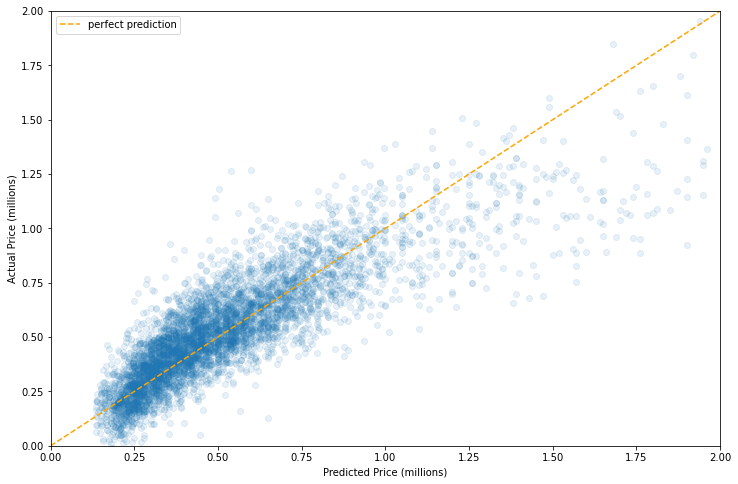

In [37]:
# Visualizing the new model's accuracy
y_hat = lr.predict(X_test)

fig, ax = plt.subplots(figsize=(12,8))
perfect_line = np.arange(0, 3)
ax.plot(perfect_line, linestyle="--", color="orange", label='perfect prediction')
ax.scatter(y_test/1000000, y_hat/1000000, alpha=0.1)
plt.xlim(0, 2)
plt.ylim(0, 2)
ax.set_xlabel("Predicted Price (millions)")
ax.set_ylabel("Actual Price (millions)")
ax.legend();

## Feature Engineering
Next, we create new features to improve the previous model even more. Given the latitude and longitude, we can find its exact distance from the major cities, from the exploration and mapping we save how influential this can be.

In [38]:
# Import the haversine formula to create a function and calculate the distances
from haversine import haversine, Unit

seattle = (47.608013, -122.335167)
redmond = (47.673988, -122.121513)

def get_dist(center, lat, long):
    house = (lat, long)
    return haversine(center, house, unit=Unit.MILES)

In [39]:
# Create a function to use for engineering the new features on our training and testing data sets
def feature_engineering(data):
    feature_data = data.copy()

    # Add distance_from_seattle column
    feature_data['distance'] = data.apply(lambda x: get_dist(seattle, x.lat, x.long), axis=1)

    # Add distance_from_redmond column
    feature_data['dist_redmond'] = data.apply(lambda x: get_dist(redmond, x.lat, x.long), axis=1)
    
    feature_data['dist_major_cities'] = feature_data['distance'] + feature_data['dist_redmond']

    feature_data.drop(columns=['lat', 'long'], inplace=True)
    return feature_data

In [40]:
# Apply the feature engineering on the train and test sets
train_set = feature_engineering(train_set)
test_set = feature_engineering(test_set)

In [41]:
# Add population density to cities and zipcodes
# Import the population data set from 2010 census
population = pd.read_csv('data/population.csv')

# Get the relevant columns
pop_density = population.loc[:, ['City Name', 'Total Population 2010', 'Population Density (Persons / Square Mile) 2010']]
pop_density.rename(columns={'City Name':'city', 'Total Population 2010':'population', 'Population Density (Persons / Square Mile) 2010':'pop_density'}, inplace=True)

# Create a list of cities and towns specific to King County and convert to dataframe
kc_city_towns = ['Algona', 'Auburn', 'Beaux Arts Village', 'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 
                 'Carnation', 'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw', 'Federal Way', 
                 'Hunts Point', 'Issaquah', 'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley', 
                 'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park', 'North Bend', 
                 'Pacific', 'Redmond', 'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline', 'Skykomish', 
                 'Snoqualmie', 'Tukwila', 'Woodinville', 'Yarrow Point']
city_names = pd.DataFrame(kc_city_towns, columns=['city'])

# Merge the two dataframes to only get King County population data
kc_population = pd.merge(pop_density, city_names, on=['city'])
kc_population = kc_population.append({'city':'Vashon','population':10624, 'pop_density':287.22}, ignore_index=True)

# Import zipcodes and corresponding cities and towns
zipcodes = pd.read_csv('data/zipcodes.csv')
zipcodes['city'] = zipcodes['zipcode'].apply(lambda x: x.split('(')[1].strip('()'))
zipcodes['zipcode'] = zipcodes['zipcode'].apply(lambda x: int(x.split()[0]))

# Merge the population and King County zipcodes dataframes
kc_zipcodes = pd.merge(kc_population, zipcodes, on=['city'])

# Merge the complete population dataframe with the housing dataset
pop_data_train = pd.merge(train_set, kc_zipcodes, how='inner', on=['zipcode'])
pop_data_test = pd.merge(test_set, kc_zipcodes, how='inner', on=['zipcode'])

In [42]:
# Get only the numeric features from the dataset
train_set = only_numeric(pop_data_train)
test_set = only_numeric(pop_data_test)
y_train, X_train = get_y_X(train_set, 'price')

In [43]:
# Run the regression on the new dataset with added features
y_train, X_train = get_y_X(train_set, 'price')
y_test, X_test = get_y_X(test_set, 'price')

train_test_compare(X_train, X_test, y_train, y_test)

 training data R2: 0.7438541954966817
 testing data R2: 0.7413448285821234                     
 training data rmse: 156852.0063281147
 testing data rmse: 153399.57971708998


In [44]:
# Get the metrics
get_metrics(X_train, X_test, y_train, y_test)

(0.7438541954966817, 0.7413448285821234, 156852.0063281147, 153399.57971708998)

In [45]:
# Update the metric table
metric_table = update_metrics('Distance Model', X_train, X_test, y_train, y_test)
metric_table

,model,train_rsquared,test_rsquared,train_rmse,test_rmse
0,Baseline Model,0.631975,0.618191,226292.826596,221129.324832
1,Clean Model,0.709398,0.708188,167068.959933,162935.151423
2,Distance Model,0.743854,0.741345,156852.006328,153399.579717


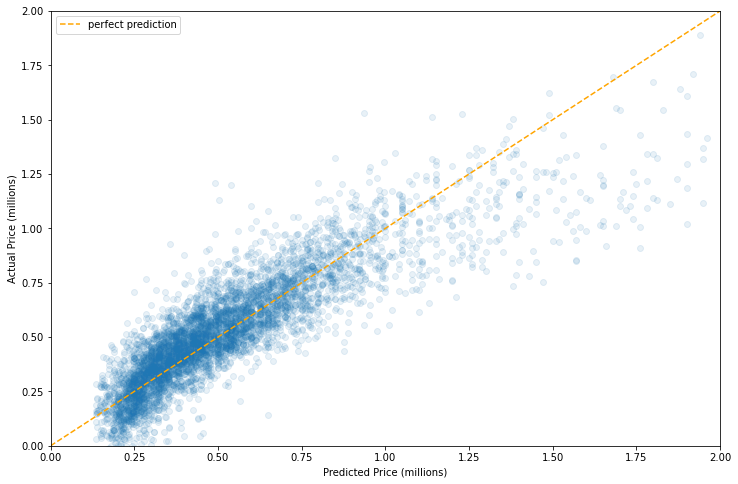

In [46]:
# Visualizing the new model's accuracy
y_hat = lr.predict(X_test)

fig, ax = plt.subplots(figsize=(12,8))
perfect_line = np.arange(0, 3)
ax.plot(perfect_line, linestyle="--", color="orange", label='perfect prediction')
ax.scatter(y_test/1000000, y_hat/1000000, alpha=0.1)
plt.xlim(0, 2)
plt.ylim(0, 2)
ax.set_xlabel("Predicted Price (millions)")
ax.set_ylabel("Actual Price (millions)")
ax.legend();

### Takeaways:
This third model shows another improvement when we added the distance to major cities as well as population and density.

## Data Transformation
Let's transform our data by applying logarithmic function to a few numerical features, and also by standardizing some numerical features.

In [47]:
# Log Transform
def log_transform(data):
    
    log_transform = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 
                 'distance', 'dist_redmond', 'population', 'pop_density']
    log_data = data.copy()

    for col in log_transform:
        log_data[col] = np.log(log_data[col])
        
    return log_data

In [48]:
# Apply the function to transform both datasets
train_set = log_transform(train_set)
test_set = log_transform(test_set)

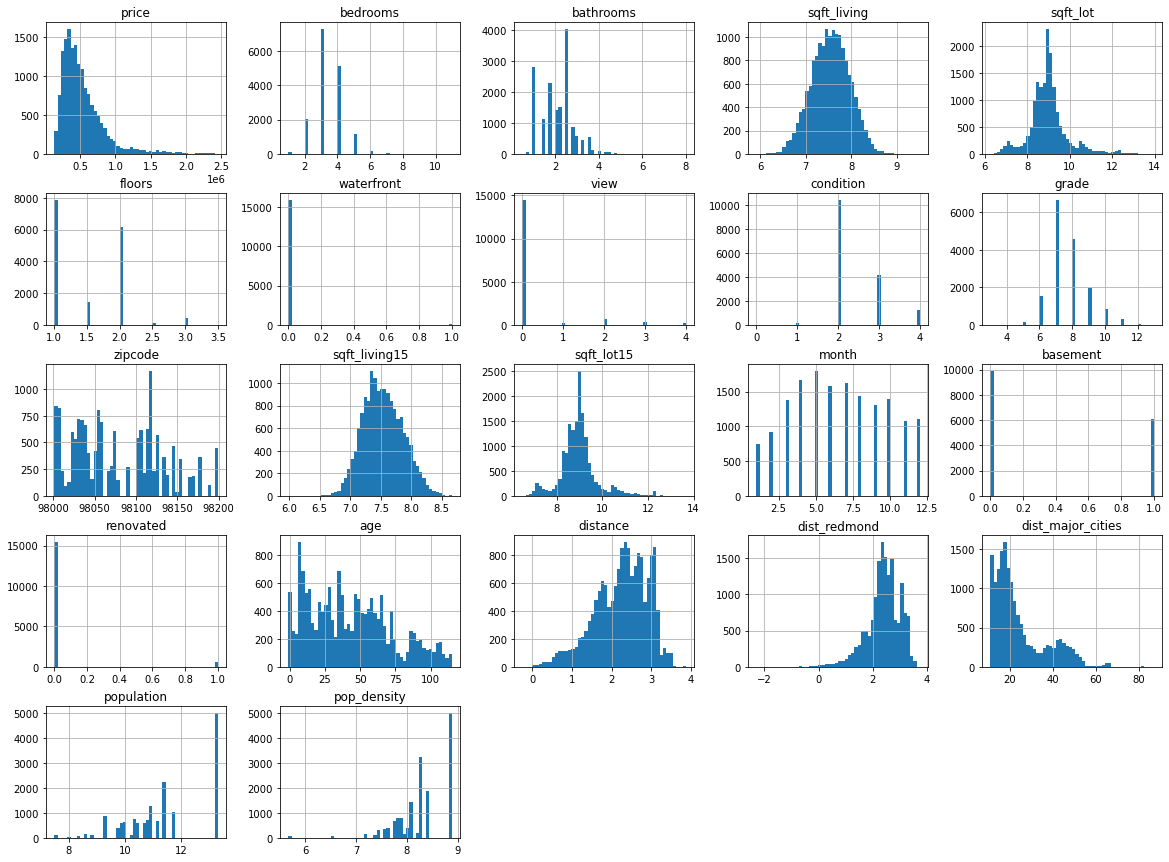

In [49]:
# Visualize the change in distributions
train_set.hist(bins=50, figsize=(20,15))
plt.show();

In [50]:
# Run the regression on the transformed datasets
y_train, X_train = get_y_X(train_set, 'price')
y_test, X_test = get_y_X(test_set, 'price')

train_test_compare(X_train, X_test, y_train, y_test)

 training data R2: 0.7346042318772285
 testing data R2: 0.7327230623523696                     
 training data rmse: 159659.0171950226
 testing data rmse: 155935.26050247593


In [51]:
# Return the metrics
get_metrics(X_train, X_test, y_train, y_test)

(0.7346042318772285, 0.7327230623523696, 159659.0171950226, 155935.26050247593)

In [52]:
# Update the metrics
metric_table = update_metrics('Logarithmic Model', X_train, X_test, y_train, y_test)
metric_table

,model,train_rsquared,test_rsquared,train_rmse,test_rmse
0,Baseline Model,0.631975,0.618191,226292.826596,221129.324832
1,Clean Model,0.709398,0.708188,167068.959933,162935.151423
2,Distance Model,0.743854,0.741345,156852.006328,153399.579717
3,Logarithmic Model,0.734604,0.732723,159659.017195,155935.260502


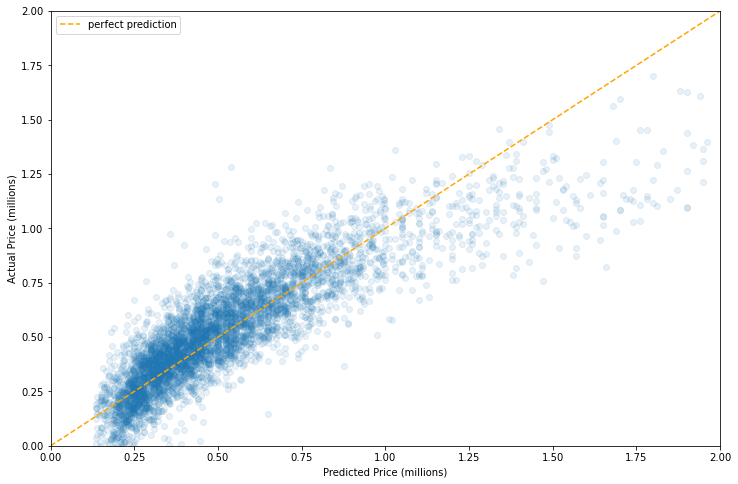

In [53]:
# Visualizing the new model's accuracy
y_hat = lr.predict(X_test)

fig, ax = plt.subplots(figsize=(12,8))
perfect_line = np.arange(0, 3)
ax.plot(perfect_line, linestyle="--", color="orange", label='perfect prediction')
ax.scatter(y_test/1000000, y_hat/1000000, alpha=0.1)
plt.xlim(0, 2)
plt.ylim(0, 2)
ax.set_xlabel("Predicted Price (millions)")
ax.set_ylabel("Actual Price (millions)")
ax.legend();

### Takeaways:
The logarithmic model did not add any impovements to the previous model's prediction or error.

### Feature Scaling and Standardization

In [54]:
# Only need numeric data
train_numeric = train_set.drop(columns=['price','waterfront', 'view', 'condition', 'grade', 'zipcode', 
                                        'month', 'basement', 'renovated'])
test_numeric = test_set.drop(columns=['price','waterfront', 'view', 'condition', 'grade', 'zipcode', 
                                        'month', 'basement', 'renovated'])

In [55]:
# Use standardization to scale the numerical features
sc = StandardScaler()

train_scaled = pd.DataFrame(sc.fit_transform(train_numeric), 
                              columns = train_numeric.columns, index = train_numeric.index)

test_scaled = pd.DataFrame(sc.transform(test_numeric), 
                              columns = test_numeric.columns, index = test_numeric.index)

In [56]:
# Merge the scaled features with the categorical features to the training and testing data sets
train_set = train_scaled.join(train_set[['price','waterfront', 'view', 'condition', 'grade', 'zipcode', 
                                        'month', 'basement', 'renovated']])
test_set = test_scaled.join(test_set[['price','waterfront', 'view', 'condition', 'grade', 'zipcode', 
                                        'month', 'basement', 'renovated']])

#Will use this scaled data for later on inferential model
train_set_inf = train_set.copy()
test_set_inf = test_set.copy()

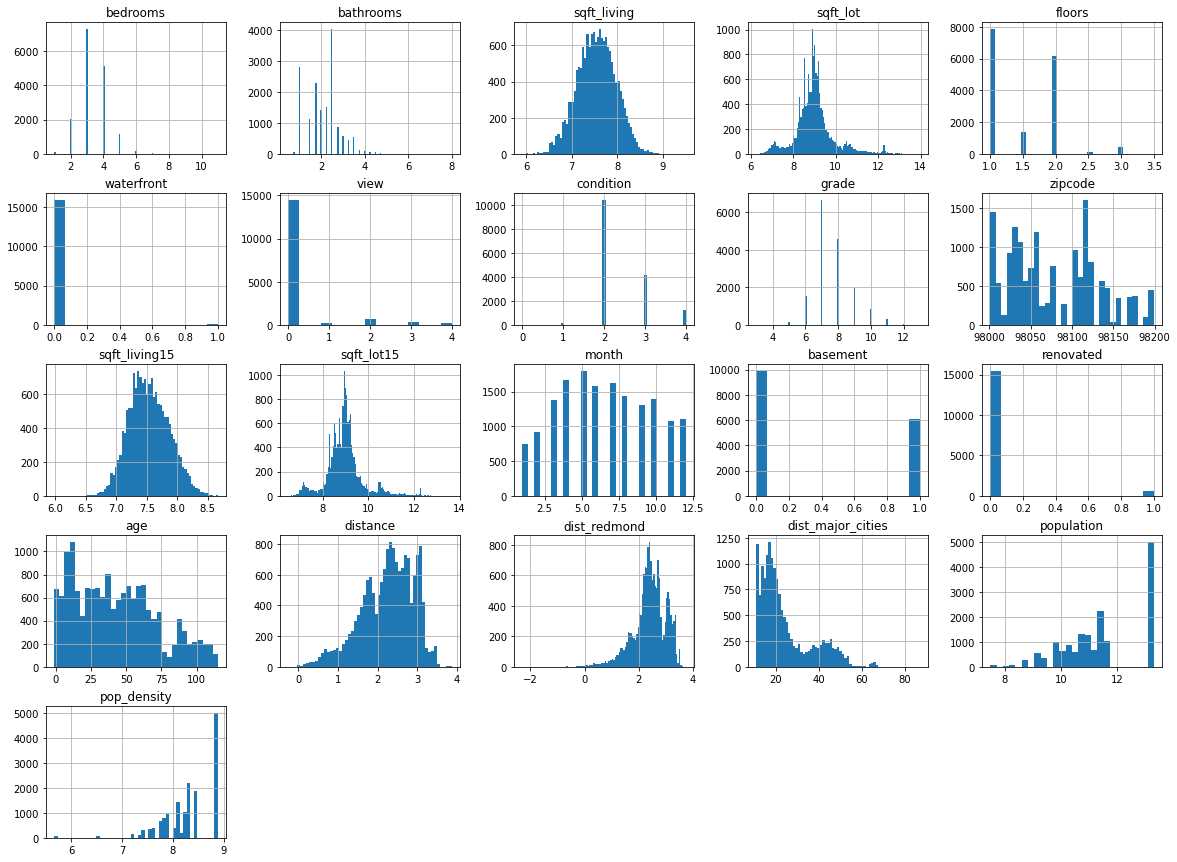

In [57]:
# Visualize the changes in distribution from the standardization
X_train.hist(bins='auto', figsize=(20,15))
plt.show()

In [58]:
# Run the regression on the standardized data
y_train, X_train = get_y_X(train_set, 'price')
y_test, X_test = get_y_X(test_set, 'price')

train_test_compare(X_train, X_test, y_train, y_test)

 training data R2: 0.7346042318772301
 testing data R2: 0.7327230623523722                     
 training data rmse: 159659.0171950221
 testing data rmse: 155935.26050247517


In [59]:
# Getting Coefficients for later inferential model
lr = LinearRegression()
lr.fit(X_train, y_train)
inf_coefs = lr.coef_
inf_coefs = zip(X_train.columns, inf_coefs)
inf_coefs = list(inf_coefs)

In [60]:
# Return the metrics
get_metrics(X_train, X_test, y_train, y_test)

(0.7346042318772301, 0.7327230623523722, 159659.0171950221, 155935.26050247517)

In [61]:
# Update the metrics
metric_table = update_metrics('Standardized Model', X_train, X_test, y_train, y_test)
metric_table

,model,train_rsquared,test_rsquared,train_rmse,test_rmse
0,Baseline Model,0.631975,0.618191,226292.826596,221129.324832
1,Clean Model,0.709398,0.708188,167068.959933,162935.151423
2,Distance Model,0.743854,0.741345,156852.006328,153399.579717
3,Logarithmic Model,0.734604,0.732723,159659.017195,155935.260502
4,Standardized Model,0.734604,0.732723,159659.017195,155935.260502


### Takeaways:
The standardized and logarithmic models show the same results. We will go back to the distance model, and improve on it next. Standardization in this case is mostly helpful for inferential insights of the coefficients. 

### Data with Categorical Variables

Next, let's deal with the categorical variables by creating dummy variables. Instead of treating them as numerical features, we will model the features according to their categories.

In [62]:
# Add back cities        
train_set_dumm = pd.concat([train_set, pop_data_train['city']], axis=1)
test_set_dumm = pd.concat([test_set, pop_data_test['city']], axis=1)

In [63]:
# Add Seasons
def bin_seasons(data):
    data['month'] = data['month'].replace(12, 0)

    bins = [0, 3, 6, 9, 11]
    data['season'] = pd.cut(data['month'], bins, include_lowest = True, labels = ['Winter', 
                                                                                      'Spring', 'Summer', 'Fall'])
    return data

In [64]:
# Create categories for seasons according to the months
train_set_dumm = bin_seasons(train_set_dumm)
test_set_dumm = bin_seasons(test_set_dumm)

In [65]:
# Create a function to make the dummy variables
def get_dummies(data):
    zipcode_dummies = pd.get_dummies(data['zipcode'], drop_first=True)
    condition_dummies = pd.get_dummies(data['condition'], prefix='cond', drop_first=True)
    month_dummies = pd.get_dummies(data['month'], prefix='month',drop_first=True)
    city_dummies = pd.get_dummies(data['city'], drop_first=True)
    season_dummies = pd.get_dummies(data['season'], drop_first=True)

    dummy_data = pd.concat([data, zipcode_dummies, city_dummies, month_dummies, season_dummies, condition_dummies], axis=1)
    
    dummy_data.drop(columns=['zipcode', 'condition', 'month', 'city', 'season'], inplace=True)
    return dummy_data

In [66]:
# Apply the function to our data sets
train_set_dumm = get_dummies(train_set_dumm)
test_set_dumm = get_dummies(test_set_dumm)

In [67]:
# Run the regression on data set with dummy variables
y_train, X_train = get_y_X(train_set_dumm, 'price')
y_test, X_test = get_y_X(test_set_dumm, 'price')
train_test_compare(X_train, X_test, y_train, y_test)

 training data R2: 0.812320290223558
 testing data R2: 0.8081204301604227                     
 training data rmse: 134262.61958522742
 testing data rmse: 132122.85659235364


In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)
inf_coefs_dum = lr.coef_
inf_coefs_dum = zip(X_train.columns, inf_coefs_dum)
inf_coefs_dum = list(inf_coefs_dum)

In [69]:
# Return the metrics
get_metrics(X_train, X_test, y_train, y_test)

(0.812320290223558, 0.8081204301604227, 134262.61958522742, 132122.85659235364)

In [70]:
# Update the metrics table
metric_table = update_metrics('Categorical Model', X_train, X_test, y_train, y_test)
metric_table

,model,train_rsquared,test_rsquared,train_rmse,test_rmse
0,Baseline Model,0.631975,0.618191,226292.826596,221129.324832
1,Clean Model,0.709398,0.708188,167068.959933,162935.151423
2,Distance Model,0.743854,0.741345,156852.006328,153399.579717
3,Logarithmic Model,0.734604,0.732723,159659.017195,155935.260502
4,Standardized Model,0.734604,0.732723,159659.017195,155935.260502
5,Categorical Model,0.812320,0.808120,134262.619585,132122.856592


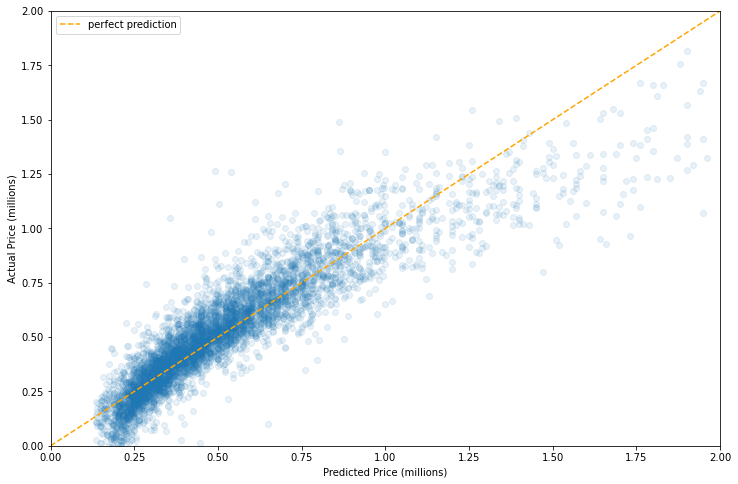

In [71]:
# Visualizing the new model's accuracy
y_hat = lr.predict(X_test)

fig, ax = plt.subplots(figsize=(12,8))
perfect_line = np.arange(0, 3)
ax.plot(perfect_line, linestyle="--", color="orange", label='perfect prediction')
ax.scatter(y_test/1000000, y_hat/1000000, alpha=0.1)
plt.xlim(0, 2)
plt.ylim(0, 2)
ax.set_xlabel("Predicted Price (millions)")
ax.set_ylabel("Actual Price (millions)")
ax.legend();

### Takeaways: 
This model shows another improvement from all the previous models, it can now explain 80% of the variance, and has an average prediction error of a little over 130,000 USD.

## Polynomial Regression
We can add complexity to our linear regression by performing a polynomial regression, this might help to better fit a curve to our data set, so we can predict on future values more accurately.

In [72]:
# Making a copy of this train and test data for polynomial transformation later on
train_set_poly = train_set.copy()
test_set_poly = test_set.copy()

In [73]:
train_set.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_living15', 'sqft_lot15', 'age', 'distance', 'dist_redmond',
       'dist_major_cities', 'population', 'pop_density', 'price', 'waterfront',
       'view', 'condition', 'grade', 'zipcode', 'month', 'basement',
       'renovated'],
      dtype='object')

In [74]:
# Use polynomial expression to a higher power of 2 or squared
pl = PolynomialFeatures(2)

X_poly_train = pd.DataFrame(
            pl.fit_transform(train_set_poly.drop('price', axis=1))
                      )

X_poly_test = pd.DataFrame(
            pl.transform(test_set_poly.drop('price', axis=1))
                      )

y_poly_train = train_set_poly.price
y_poly_test = test_set_poly.price

In [75]:
# Merge the X sets we used polynomial features on with the Y sets of the target variable, price
train_set_poly = pd.concat([y_poly_train, X_poly_train], axis=1)
test_set_poly = pd.concat([y_poly_test, X_poly_test], axis=1)

In [76]:
# Run the linear regression on this model
y_train, X_train = get_y_X(train_set_poly, 'price')
y_test, X_test = get_y_X(test_set_poly, 'price')
train_test_compare(X_train, X_test, y_train, y_test)

 training data R2: 0.8639732745959385
 testing data R2: 0.8519275798652111                     
 training data rmse: 114303.24935718087
 testing data rmse: 116064.83921974868


In [77]:
# Get the metrics
get_metrics(X_train, X_test, y_train, y_test)

(0.8639732745959385,
 0.8519275798652111,
 114303.24935718087,
 116064.83921974868)

In [78]:
# Update the metrics
metric_table = update_metrics('Polynomial Model', X_train, X_test, y_train, y_test)
metric_table

,model,train_rsquared,test_rsquared,train_rmse,test_rmse
0,Baseline Model,0.631975,0.618191,226292.826596,221129.324832
1,Clean Model,0.709398,0.708188,167068.959933,162935.151423
2,Distance Model,0.743854,0.741345,156852.006328,153399.579717
3,Logarithmic Model,0.734604,0.732723,159659.017195,155935.260502
4,Standardized Model,0.734604,0.732723,159659.017195,155935.260502
5,Categorical Model,0.812320,0.808120,134262.619585,132122.856592
6,Polynomial Model,0.863973,0.851928,114303.249357,116064.839220


### Takeaways:
Our final linear regression model is this polynomial model with the highest r-square value of 82%, and an average prediction error of around 126,000 USD. We call this our Bestimate Model, showing a huge improvement from the very first baseline model.

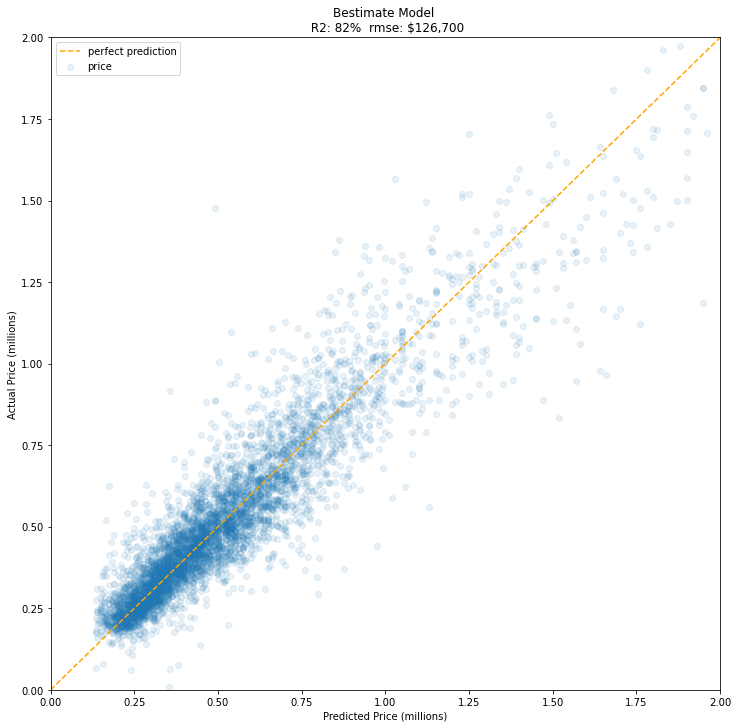

In [79]:
# Visualize the prediction
y_hat = lr.predict(X_test)

fig, ax = plt.subplots(figsize=(12,12))
perfect_line = np.arange(0, 3)
ax.plot(perfect_line, linestyle="--", color="orange", label='perfect prediction')
plt.xlim(0, 2)
plt.ylim(0, 2)
ax.scatter(y_test/1000000, y_hat/1000000, alpha=0.1, label='price')
ax.set_xlabel("Predicted Price (millions)")
ax.set_ylabel("Actual Price (millions)")
ax.set_ylabel("Actual Price (millions)")
ax.set_title("Bestimate Model \n R2: 82%  rmse: $126,700")
ax.legend();

Here you can see the visualization of how well the prediction model works. 

The yellow dotted line shows where an accurate prediction would take place. The x-axis is showing the price the model predicted, while the y-axis is showing that actual price of the home.

You can see that with the Bestimate model, we were able to get those predictions clustered more closely towards an accurate prediction.

## Results
Let's take a look at the improvements of average prediction error across all our models.

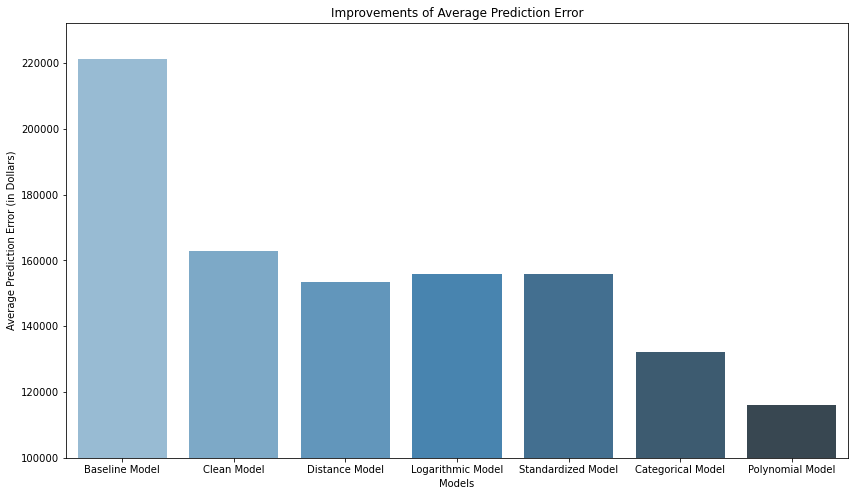

In [81]:
# Visualize the performance of our model
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(x=metric_table['model'], y=metric_table['test_rmse'], palette="Blues_d")
plt.ylim(100000)
ax.set_ylabel("Average Prediction Error (in Dollars)")
ax.set_xlabel("Models")
ax.set_title("Improvements of Average Prediction Error");

To evaluate the performance of multiple models we’ve built, we look at a metric that measures the error in our predictions. The baseline model has an average error of around 220,000 dollars. The first drop in RMSE was from our initial cleaning of the data, then adding our distance and population metrics. Next, we also tried some logarithmic transformations and standardizations which did not improve our error. Finally, we created dummy variables of all the categorical data and to take a step further, we used a polynomial transformation to better fit the data, resulting to about a 100,000 dollar improvement from the company’s baseline model.

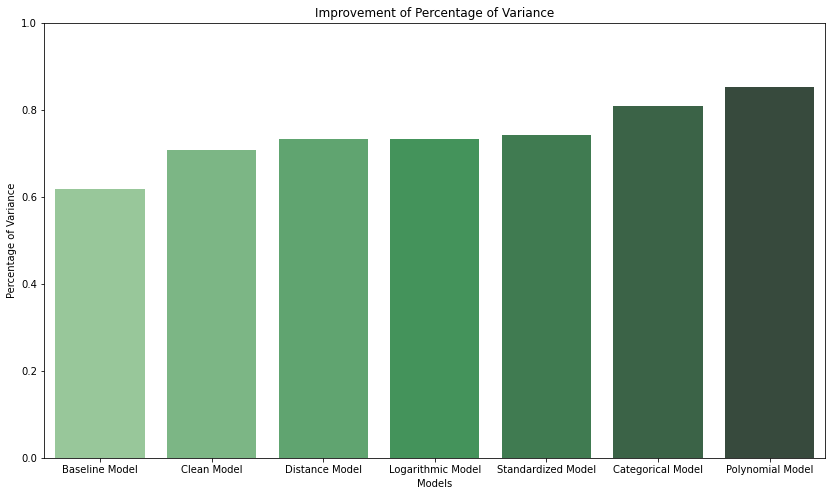

In [82]:
# Visualize our model performance using the r-squared metrics
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(x=metric_table['model'], y=sorted(metric_table['test_rsquared']), palette="Greens_d")
plt.ylim(0, 1)
ax.set_xlabel("Models")
ax.set_ylabel("Percentage of Variance")
ax.set_title("Improvement of Percentage of Variance");

Similary to the error metric, our R-squared value improved through our modeling process. Starting at approx. 61% in the baseline model, to approx. 81% in the polynomial model. This means that 81% of the variance in the data is explained by the model.

## Inferential Model
Let's visualize the inferential model from which we can interpret how the coefficients explain price change from the scaled numeric data.

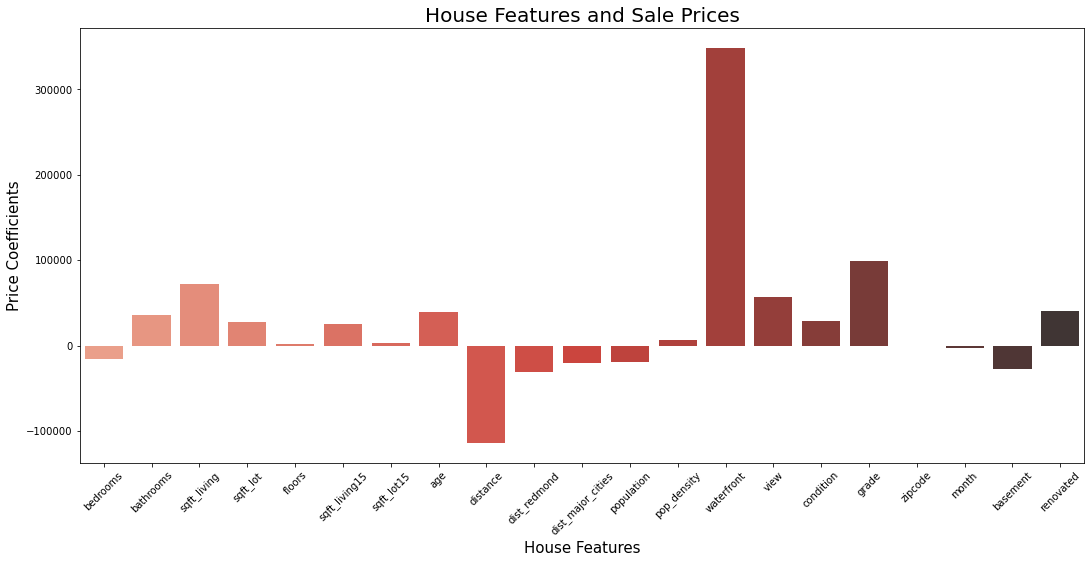

In [83]:
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(x=[x[0] for x in inf_coefs], y=[x[1] for x in inf_coefs], palette="Reds_d")
plt.xticks(rotation=45)
ax.set_ylabel("Price Coefficients", fontsize=15)
ax.set_xlabel("House Features", fontsize=15)
ax.set_title("House Features and Sale Prices", fontsize=20);

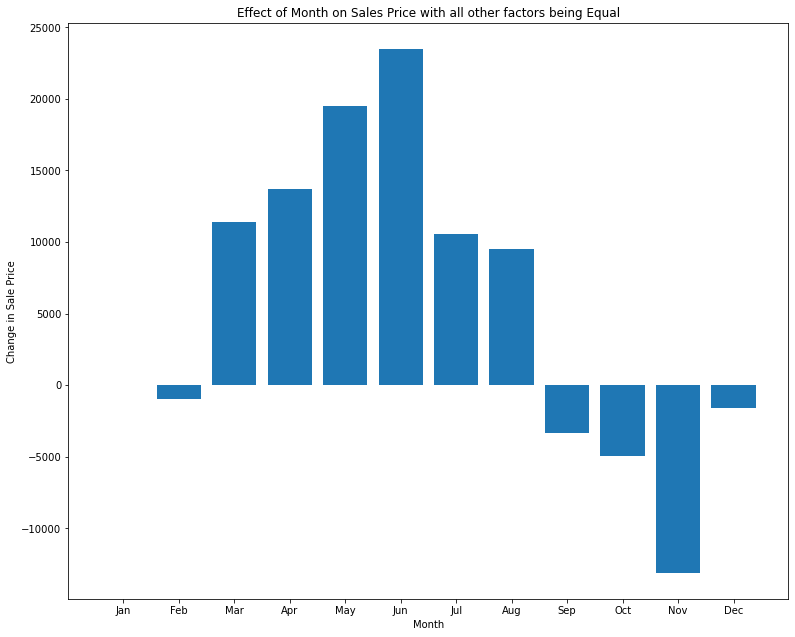

In [84]:
# Visualizing the effect of month on sale prices
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Effect of Month on Sales Price with all other factors being Equal')
plt.ylabel("Change in Sale Price")
plt.xlabel("Month")
Month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
Effect_on_Sale_Price = [0, -974, 11370, 13730, 19510, 23490, 10560, 9491, -3323, -4986, -13110, -1591]
ax.bar(Month, Effect_on_Sale_Price)
plt.show();

In [85]:
# import pickle
# filename = './Models/final_lr.sav'
# pickle.dump(lr, open(filename, 'wb'))

## Ensemble Methods

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

### Polynomial

In [87]:
dt = DecisionTreeRegressor(max_depth=8)
dt.fit(X_train, y_train)
print(cross_val_score(dt, X_train, y_train, cv=3).mean())
dt.score(X_test, y_test)

0.6595684979775794


0.7735556652348627

In [89]:
rf = RandomForestRegressor(max_depth=8)
rf.fit(X_train, y_train)
print(cross_val_score(rf, X_train, y_train, cv=3).mean())
rf.score(X_test, y_test)

0.7897166858742405


0.8483784530682175

### Categorical

In [90]:
y_train, X_train = get_y_X(train_set_dumm, 'price')
y_test, X_test = get_y_X(test_set_dumm, 'price')

In [91]:
dt = DecisionTreeRegressor(max_depth=8)
dt.fit(X_train, y_train)
print(cross_val_score(dt, X_train, y_train, cv=3).mean())
dt.score(X_test, y_test)

0.6813546603369153


0.782025089014265

In [92]:
rf = RandomForestRegressor(max_depth=50, n_estimators=100)
rf.fit(X_train, y_train)
print(cross_val_score(rf, X_train, y_train, cv=3).mean())
print(rf.score(X_train, y_train))
rf.score(X_test, y_test)

0.7934710223503315
0.9823110879204648


0.8719448137535134

In [93]:
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))
    
print(f'training data rmse: {train_rmse}\n testing data rmse: {test_rmse}')

training data rmse: 41218.958731239254
 testing data rmse: 107934.96942950926


In [102]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

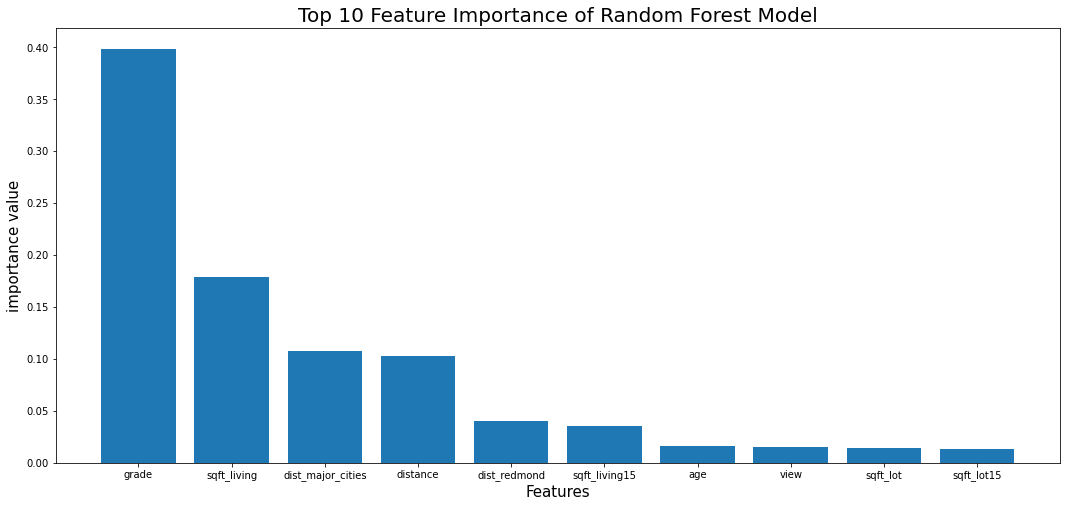

In [116]:
fig, ax = plt.subplots(figsize=(18,8))
ax.bar(x=importances.index[:10], height=importances.values[:10])
ax.set_ylabel("importance value", fontsize=15)
ax.set_xlabel("Features", fontsize=15)
ax.set_title("Top 10 Feature Importance of Random Forest Model", fontsize=20);

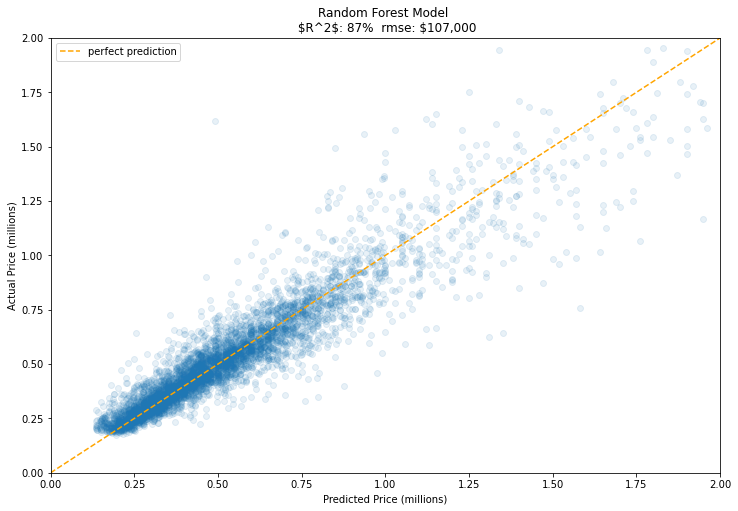

In [117]:
# Visualizing the new model's accuracy
y_hat = rf.predict(X_test)

fig, ax = plt.subplots(figsize=(12,8))
perfect_line = np.arange(0, 3)
ax.plot(perfect_line, linestyle="--", color="orange", label='perfect prediction')
ax.scatter(y_test/1000000, y_hat/1000000, alpha=0.1)
plt.xlim(0, 2)
plt.ylim(0, 2)
ax.set_xlabel("Predicted Price (millions)")
ax.set_ylabel("Actual Price (millions)")
ax.set_title("Random Forest Model \n $R^2$: 87%  rmse: $107,000")
ax.legend();

In [118]:
# import pickle
# filename = './Models/final_rf.sav'
# pickle.dump(rf, open(filename, 'wb'))

### simple app predictor

In [119]:
X_test_app = X_test.copy()
y_test_app = y_test.copy()

In [120]:
X_test_app.to_csv('./Data/X_test_app.csv', index=False)
y_test_app.to_csv('./Data/y_test_app.csv', index=False)

In [121]:
train_set, test_set = train_test(clean_data, .25)
train_set = feature_engineering(train_set)
test_set = feature_engineering(test_set)

In [122]:
train_set.reset_index(inplace=True)
test_set.reset_index(inplace=True)

In [123]:
train_set = train_set.loc[0:, ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 
                                'waterfront', 'view', 'grade', 'basement', 'dist_major_cities']]
test_set = test_set.loc[0:, ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 
                                'waterfront', 'view', 'grade', 'basement', 'dist_major_cities']]

In [124]:
y_train, X_train = get_y_X(train_set, 'price')
y_test, X_test = get_y_X(test_set, 'price')

In [125]:
rf = RandomForestRegressor(max_depth=10, n_estimators=100)
rf.fit(X_train, y_train)
print(cross_val_score(rf, X_train, y_train, cv=3).mean())
print(rf.score(X_train, y_train))
rf.score(X_test, y_test)

0.7897834164041578
0.8796758626222384


0.7841399526768262

In [126]:
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))
    
print(f'training data rmse: {train_rmse}\n testing data rmse: {test_rmse}')

training data rmse: 107503.55678278304
 testing data rmse: 140136.00122526314


In [127]:
# import pickle
# filename = './Models/simple_rf.sav'
# pickle.dump(rf, open(filename, 'wb'))

### Takaways:

The random forest easilty outperformed the linear regerssion in this case. R-sqared is now at 87% and RMSE is at 107,000 USD.

## Online Calculator
For the final product, we created an online application to predict housing prices using our inferential model. This application can be used privately by your firm and real estate agents.

[Calculator](https://kingcountycalculator.czarinagarcia.repl.co/)

## Conclusion

After cleaning and running various models we found several effective methods of examining the data: 

Using a scaled inferential model we are better able to examine the effects of various features on the sale price of homes in King County Washington. This shows that the largest effect on the sale price is distance from Seattle city center, followed by the size of living space, and the age of the home. It also allows us to build an online calculator, allowing potential customers to see the interplay between features and price.

Finally, our Bestimate model is both predictive of the average sales price of homes. We found the the polynomial model was the most predictive and produced an R squared of roughly 84% and an average difference in price prediction was 120,000 USD.

## Next Steps
Other methods that can improve our model would be to include crime data by zip code, school rating data by school zone, and including more years of data.